## 決定木

### 事前に端末にて以下を実行し、graphviz環境を構築しておくこと
* conda install python-graphviz
* pip install pydotplus

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

### データ生成

,label,x1,x2
0,1,0.10,0.1
1,0,0.10,0.5
2,0,0.20,0.7
3,1,0.25,0.2
4,0,0.20,0.6


((0, 1), (0, 1))

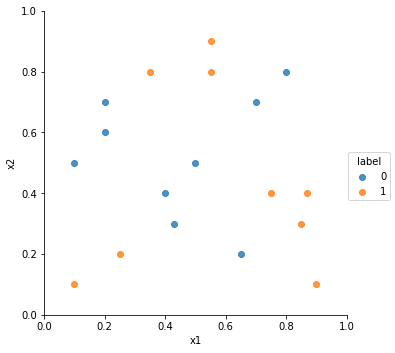

In [13]:
df = pd.DataFrame({"x1":[0.1,0.1,0.2,0.25,0.2,0.35,0.4,0.43,0.65,0.55,0.55,0.5,0.75,0.7,0.85,0.87,0.8,0.9],
                  "x2":[0.1,0.5,0.7,0.2,0.6,0.8,0.4,0.3,0.2,0.9,0.8,0.5,0.4,0.7,0.3,0.4,0.8,0.1],
                  "label":[1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1]})
display(df.head())
sns.lmplot(x="x1", y="x2", hue="label", data=df,fit_reg=False)
plt.ylim([0,1]),plt.xlim([0,1])

### [演習]
* ラベル0とラベル1を識別するための境界線をひいてみましょう
* 境界線を引くときのルール
    * 境界線は、複数引いてもよいが、なるべく少ない方がよい
    * 境界線は、x1軸またはx2軸に平行にすること
    * 境界線どうしは交差してはならない
    * 全データのクラスを完璧に識別できるものにすること

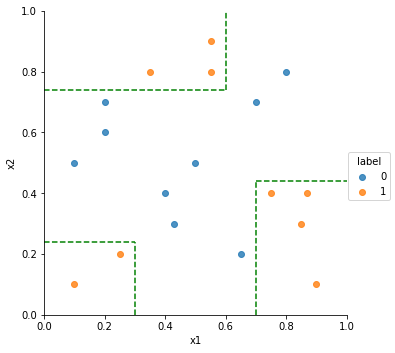

In [27]:
# 記入用

def decision_line():
    sns.lmplot(x="x1", y="x2", hue="label", data=df,fit_reg=False)
    plt.ylim([0,1]),plt.xlim([0,1])

    # 境界線の例。 以下の数字を編集してください。必要であればコピーして境界線を増やしてください
    plt.plot([0,0.6], [0.74,0.74], ls = "--",color="g")
    plt.plot([0,0.3], [0.24,0.24], ls = "--",color="g")
    plt.plot([0.7,1], [0.44,0.44], ls = "--",color="g")

    # 縦線
    plt.plot([0.3,0.3], [0.0,0.24], ls = "--",color="g") # (x1, x1), (x2,x2)
    plt.plot([0.6,0.6], [0.74,1], ls = "--",color="g") # (x1, x1), (x2,x2)
    plt.plot([0.7,0.7], [0.0,0.44], ls = "--",color="g") # (x1, x1), (x2,x2)
    
        
decision_line()
plt.show()

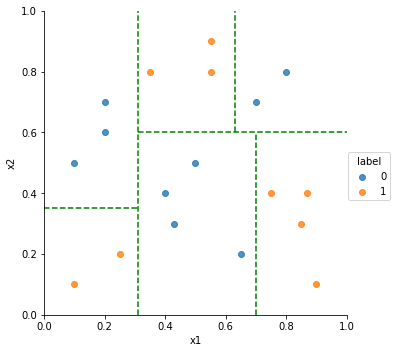

In [28]:
# 回答

def decision_line():
    sns.lmplot(x="x1", y="x2", hue="label", data=df,fit_reg=False)
    plt.ylim([0,1]),plt.xlim([0,1])

    # 境界線の例。 以下の数字を編集してください。必要であればコピーして境界線を増やしてください
    plt.plot([0.31,0.31], [0.0,1], ls = "--",color="g")
    plt.plot([0.31,1], [0.6,0.6], ls = "--",color="g")
    plt.plot([0.7,0.7], [0,0.6], ls = "--",color="g")
    plt.plot([0.63,0.63], [0.6,1.0], ls = "--",color="g")
    plt.plot([0.0,0.31], [0.35,0.35], ls = "--",color="g")
    

decision_line()
plt.show()

### [ 問]
* 新しいデータX_testが観測されました。
* あなたの識別境界では、0と1のどちらと識別されますか？

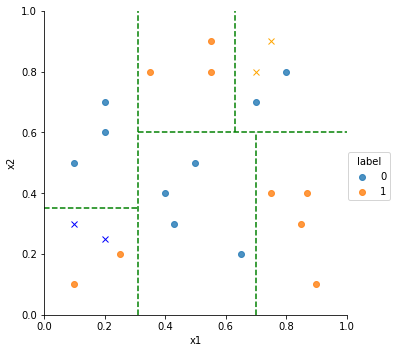

In [29]:
X_test = [
    [0.10,0.30],
    [0.20,0.25],
    [0.70,0.80],
    [0.75,0.90]
]
    
decision_line()    
plt.plot(X_test[0][0], X_test[0][1], marker="x",color="b")
plt.plot(X_test[1][0], X_test[1][1], marker="x",color="b")
plt.plot(X_test[2][0], X_test[2][1], marker="x",color="orange")
plt.plot(X_test[3][0], X_test[3][1], marker="x",color="orange")
plt.show()

### 決定木とは
* 単純な識別器の組みわせで複雑な識別境界を構成する手法。
* 回帰問題にも用いることができる。
* 決定木では、条件分岐を増やしていくことで、木を成長させていく。
* 基本的には、左と右に分かれる2分木。
* どの条件分岐が良いかは、不純度によって判断する。
* 現在のノードの不純度と、分岐後の左右ノードの不純度合計を比較し、最も不純度が減る条件分岐を採用する。

        
### 一般的によく使われる不純度(Impurity)

#### エントロピー(Entropy)
確率変数のばらつきを表す指標  
$\displaystyle I(t) = - \sum^C_{i=1} p(C_i|t)\log_2p(C_i|t)$  
  


#### ジニ係数(Gini Index)
誤分類する確率を平均化した指標  
$\displaystyle I(t) = \sum^C_{i=1} p(C_i|t)(1-p(C_i|t)) = 1 - \sum^C_{i=1} p(C_i|t)^2$
 
    
$I(t)$: ノード$t$における不純度  
$p(C_i|t)$: ノード$t$において、クラス$C_i$になる確率

## scikit-learnで決定木を生成する

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
X_train = df[["x1","x2"]].values
y_train = df["label"].values
clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))
print(clf.predict(X_test)) #予測したい場合

score= 0.8333333333333334
[1 1 1 1]


[0.44137931 0.55862069]


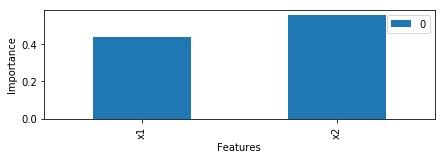

In [7]:
# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=["x1","x2"]).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

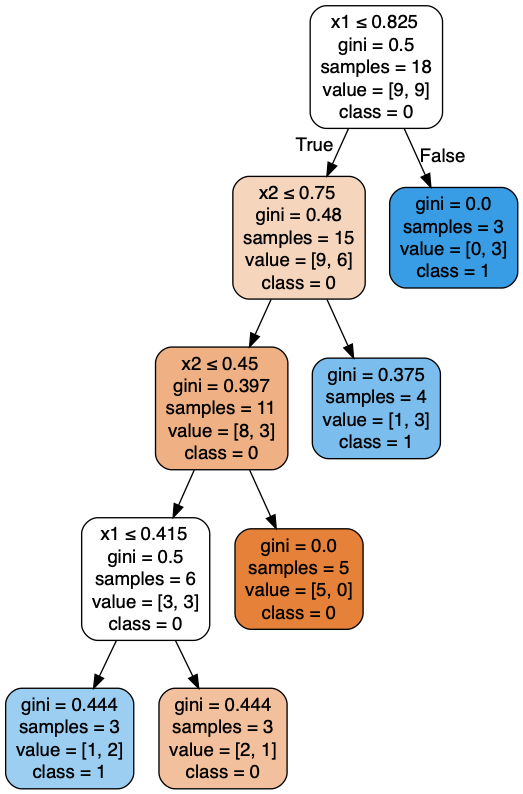

In [8]:
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=["x1", "x2"],  
                     class_names=["0","1"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### [演習]
* 不純度の評価方法を変更してみましょう
* max_depthの値を変更してみましょう
* min_samples_splitの値を変更してみましょう
* min_samples_leafの値を変更してみましょう

### Iris問題を解いてみる
petal : 花弁  
sepal : がく片

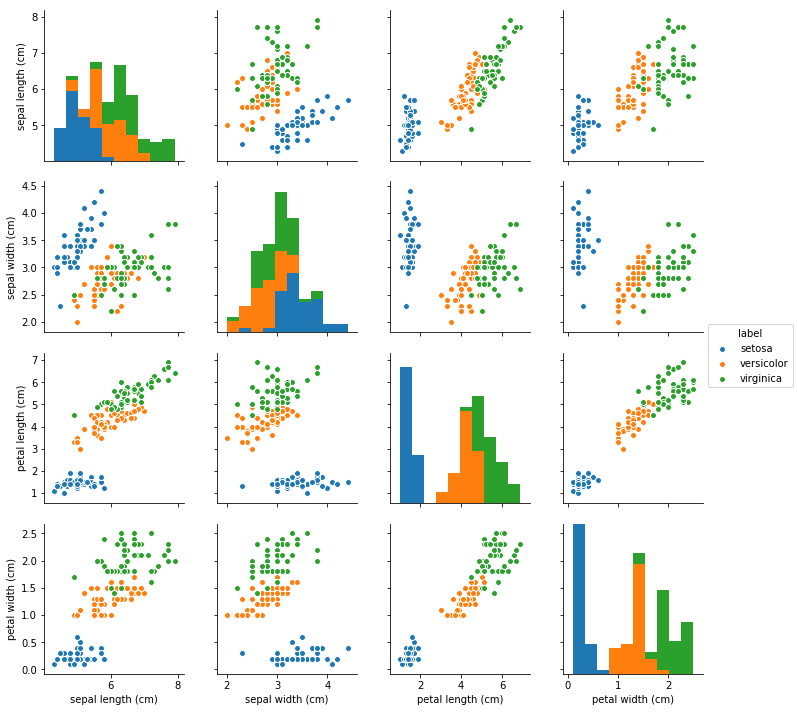

In [9]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["label"] = iris.target
df_iris["label"] = df_iris["label"].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
sns.pairplot(df_iris, hue="label")

score= 0.98



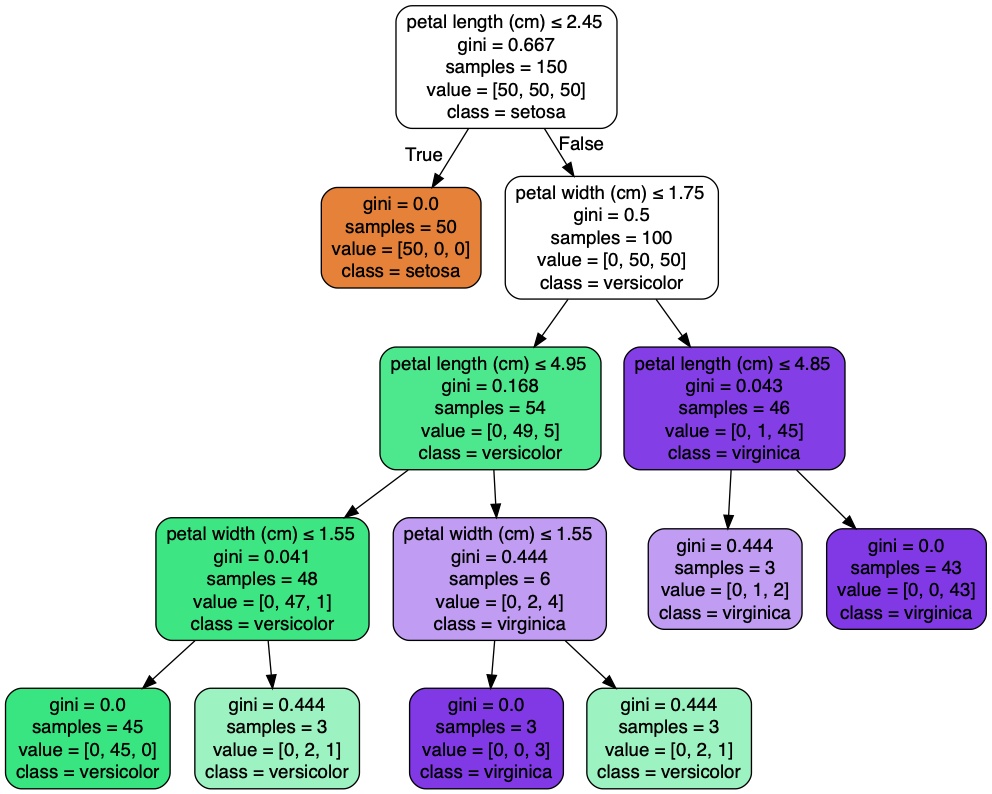

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
X_train = iris.data
y_train = iris.target
clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())